<h1 style="font-family:serif"><span style="color:#680436">Exploratory data analysis of inner wear data</span></h1>
<p/>
<i>Discovering the secrets of Victoria and other lingerie brands</i>

<div class="row">
  <div class="column" >
    <a href="https://www.ae.com/aerie"><img src="https://www.ae.com/assets/ae/logos/Aerie.svg" alt="Aerie" style="width: 70px;" align="left"/></a>
  </div> 
  <div class="column">
      <a href="https://www.victoriassecret.com/"><img src="http://1000logos.net/wp-content/uploads/2017/12/Victoria-Secret-Logo.png" alt="Victoria's Secret" style="width: 150px;" align="left"/></a>
  </div>
  <div class="column">
    <a href="https://www.macys.com/"><img src="https://www.macysinc.com/Assets/img/press-room/logo-photo-gallery/logos-macys-inc/high/macys-inc-logo-black-on-white_high.jpg" alt="Macys" style="width: 140px;" align="left"/></a>
  </div>
  <div class="column">
    <a href="https://www.calvinklein.us/en/"><img src="https://media1.calvinklein.com/images/ck-logo.png" alt="Calvin Klein" style="width: 100px;" align="left"/></a>
  </div>
  <div class="column">
    <a href="https://www.amazon.com"><img src="https://cdn.worldvectorlogo.com/logos/amazon-icon.svg
" alt="Amazon" style="width: 60px;" align="left"/></a>
  </div>
  <div class="column">
    <a href="https://shop.nordstrom.com/m"><img src="https://seeklogovector.com/wp-content/uploads/2018/06/nordstrom-logo-vector.png" alt="Nordstrom" style="width: 120px;" align="left"/></a>
  </div>
  <div class="column">
    <a href="https://btemptd.wacoal-america.com"><img src="https://btemptd.wacoal-america.com/wcsstore/BtemptdStorefrontAssetStore/upload/images/Btemptd_Logo.png" alt="B.Tempt'd" style="width: 120px;" align="left"/></a>
  </div>
  <div class="column">
    <a href="http://us.topshop.com/"><img src="https://botw-pd.s3.amazonaws.com/styles/logo-thumbnail/s3/0002/6065/brand.gif" alt="TopShop" style="width: 120px;" align="left"/></a>
  </div>
  <div class="column">
    <a href="https://www.hankypanky.com">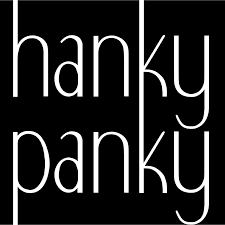</a>
  </div>  
  


I am using this [dataset](https://www.kaggle.com/PromptCloudHQ/innerwear-data-from-victorias-secret-and-others
 "Innerwear data from Kaggle")

__Basic Exploration__

*Let's reveal the following secrets*

* What sizes does each brand support ?
* What is the range of product categories supported by each brand?
* What is the price range of products? Which items are the most/least expensive?
* What products are most discounted ?
* Which product categories are more reviewed than others ?
* Which products have the least reviews ?
* What are the generic and unique colors supported by each brand?
* What is the generally the customer sentiment, based on reviews?

In [ ]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot as pyplt
import numpy as np

In [ ]:
def describe_dataset(df):
    print(df.iloc[0]["retailer"])
    print("Number of rows: %d" %(df.shape[0]))
    display(df.head(1))

In [ ]:
df_list=[]

aerie_df = pd.read_csv("../input/ae_com.csv")
df_list.append(aerie_df)

calvin_klein_df = pd.read_csv("../input/calvinklein_com.csv")
df_list.append(calvin_klein_df)

amazon_df = pd.read_csv("../input/amazon_com.csv")
df_list.append(amazon_df)

btempted_df = pd.read_csv("../input/btemptd_com.csv")
df_list.append(btempted_df)

hanky_panky_df = pd.read_csv("../input/hankypanky_com.csv")
df_list.append(hanky_panky_df)

macys_df = pd.read_csv("../input/macys_com.csv")
df_list.append(macys_df)

nordstrom_df = pd.read_csv("../input/shop_nordstrom_com.csv")
df_list.append(nordstrom_df)

topshop_df = pd.read_csv("../input/us_topshop_com.csv")
df_list.append(topshop_df)

victoriassecret_df = pd.read_csv("../input/victoriassecret_com.csv")
df_list.append(victoriassecret_df)

In [ ]:
merged_df = pd.DataFrame()

for df in df_list:
    merged_df = merged_df.append(df)

<h2 style="font-family:serif"><span style="color:#680436">Quick Look</span></h2>

In [ ]:
for df in df_list:
    describe_dataset(df)

<div class="row">
  <div class="column" >
      <h1 style="font-family:serif"><span style="color:#680436">Clean the datasets</span></h1>
  </div>
  <div class="column">
      <img src="https://www.freeiconspng.com/uploads/clean-home-png-12.png" style="width: 70px;" align="right"/>
  </div>  
</div>

<h3 style="font-family:serif"><span >Standardize price values</span></h3>

The notation used to denote the prices vary across datasets

Example
* Foreign currency (We've converted the price to USD)
* Ranges (In which case we opted to keep the lower limit)
* Symbol - USD vs $

I have standardized the values to be represented in US dollars. 

In [ ]:
#Standardize price values used across datasets
import re

colon_to_dollar_conversion_rate = 0.0017
ind_rp_to_dollar_conversion_rate = 0.000066

def extract_usd_value(value_str):
    if type(value_str) is str:
        value_str= value_str.strip().lower().replace('usd', '').replace('$','').replace("\-.*","").strip()
        value_str = re.sub(r"-.*", "", value_str)
        value_str = re.sub(r"–.*", "", value_str)
        value_str = re.sub(r"\s.*", "", value_str)
        value_str.strip()
        
        if "₡" in value_str:
            value_str = value_str.replace("₡", "").strip()
            value_str = pd.to_numeric(value_str) * colon_to_dollar_conversion_rate            
        elif "rp" in value_str:
            value_str = value_str.replace("rp", "").strip()
            value_str = pd.to_numeric(value_str) * ind_rp_to_dollar_conversion_rate                
            
        return value_str
    else:
        return value_str
    
merged_df['mrp']=merged_df['mrp'].apply(extract_usd_value).apply(pd.to_numeric)
merged_df['price']=merged_df['price'].apply(extract_usd_value).apply(pd.to_numeric)

<h3 style="font-family:serif"><span >Standardize brand names</span></h3>

In [ ]:
pd.value_counts(merged_df['brand_name']).plot.bar()

In [ ]:
def standardize_brand_names(brand_name):
    brand_name = brand_name.lower()
    brand_name = brand_name.replace("-", " ")
    
    if "hanky" in brand_name:
        brand_name = "hanky panky"
    elif "calvin" in brand_name:
        brand_name = "calvin klein"
    elif "wacoal" in brand_name or "tempt" in brand_name:
        brand_name = "b.tempt'd"
    elif "victorias" in brand_name:
        brand_name = "victoria's secret"
    elif "aeo" in brand_name:
        brand_name = "aerie"
    brand_name = brand_name.strip()
    return brand_name
merged_df['brand_name'] = merged_df['brand_name'].apply(standardize_brand_names)

In [ ]:
pd.value_counts(merged_df['brand_name']).plot.bar()

In [ ]:
brand_counts = pd.value_counts(merged_df['brand_name'])

**Observations**

* Nintendo, Sexy Hair, S seem like odd brand names. Likely have come in from the Amazon dataset.

* The dataset for Victoria's Secret is much larger than the other brands. However, all the datasets were extracted from the individual retailer webpages between a fixed duration. Hence, the larger dataset may be explained by 
    * A larger inventory 
    * Amazon being a reseller for their brand
    * Other websites having limits for data scraping 
    
 * We see some brands with records in the single-digit numbers. We need to drop these as they do not have sufficient data to be useful.

In [ ]:
#Drop all the brands with insufficient records

MIN_RECORDS = 100

for item in brand_counts.iteritems():
    brand = item[0]
    count = item[1]
    
    if(count < MIN_RECORDS):
        merged_df.drop(merged_df[merged_df.brand_name == brand].index, inplace=True)   

Let's take a look at the product categories

In [ ]:
product_categories = pd.value_counts(merged_df['product_category'])
print("There are %d categories! "% (product_categories.shape[0]))


In [ ]:
product_categories.plot.pie(figsize=(10,10))

The individual brands have added their product branding into the category. This is not useful for me while comparing products across brands.
Let's organize these categories into broad groups then!

In [ ]:
categories = {
    "bra" : ["bra", "push-up", "classic", "tomgirl", "collections", "longline", "bridget", "hannah", "audrey", "lorna jane", "katie", "brooke", "push", "padded", "demi", "scoop", "full coverage", "wireless", "plunge"],
    "panty" : ["panty", "panties", "brief", "hiphugger","cheekies", "thong", "hipster", "cheekster", "short", "bottom", "undies"],
    "bikini" : ["bikini", "triangle", "one-piece", "one piece", "high-neck", "hineck"],
    "top" : ["tee", "top", "tank", "halter", "bandeau", "racerback", "cami", "crop"],
    "lingerie": ["slip", "garter", "babydoll", "lingerie", "teddy", "sleepwear", "fishnet", "robe", "kimono", "bodysuit", "romper", "tunic"],
    "shapewear": ["shapewear", "bustier"],
    "socks" : ["sock"],
    "leggings": ["legging"],
    "bottle": ["bottle"],
    "hoodie" : ["full-zip"],
    "kit" : ["kit", "duffle"],
    "petal": ["petal"]
    
}

def standardize_product_category(row):
    product_category = row["product_category"]
    product_name = row["product_name"]
    
    product_name = product_name.lower()
    product_category = product_category.lower()
    for group, items in categories.items():
        for item in items:
            if item in product_category:
                return group

    for group, items in categories.items():
        for item in items:
            if item in product_name:
                return group

    return product_category

        

merged_df["product_group"] = merged_df.apply(standardize_product_category, axis=1)

product_group = pd.value_counts(merged_df['product_group'])
display(product_group)
print("There are %d categories! "% (product_group.shape[0]))
product_group.plot.pie(figsize=(10,10))


Some of the categories have fewer than 200 items. These categories have insufficient data to make an effective comparison.

In [ ]:
#Drop all the brands with insufficient records

MIN_RECORDS = 100

for item in product_group.iteritems():
    category = item[0]
    count = item[1]
    
    if(count < MIN_RECORDS):
        merged_df.drop(merged_df[merged_df.product_group == category].index, inplace=True)   

<h2 style="font-family:serif"><span style="color:#680436">What's the MRP range across brands ?</span></h2>


In [ ]:
sns.boxplot( x=merged_df["mrp"], y=merged_df["brand_name"], palette = "Pastel2").set_title('MRP range across brands')

**Observations**

* Vanity Fair is the most affordable lingerie brand
* Most lingerie items can be bought for an average price of around 30-40 USD and within a max price of 200 USD.
* Hanky Panky has the most expensive lingerie. We have items that are priced at 600 USD.
    * Q1. What are these higher priced items?

In [ ]:
merged_df[merged_df["mrp"] > 400]

Turns out they are all 30-pack of thongs. Which puts around each item of underwear at around 20$. Still pricey, but doesn't seem that outrageous anymore.

I'm thinking of buying some new underwear. Let's find out what the prices look like across brands for each product category! 


In [ ]:
import matplotlib as plt
from matplotlib import *

product_group = pd.value_counts(merged_df['product_group'])

for item in product_group.iteritems():
    category = item[0]
    
    product_group_df = merged_df[merged_df["product_group"] == category]
    plt.pyplot.figure()
    title = "MRP range across brands for "+ category 
    sns.boxplot( x=product_group_df["mrp"], y=product_group_df["brand_name"], palette = "Pastel2").set_title(title)

The most competition is among bras and panties here. Not so much of a choice with shapewear in this dataset. All brands seem to have rather comparable price ranges for bras and panties. Hanky Panky has a few items that are pricier, not including the 20/30 pack of underwear.


<h2 style="font-family:serif"><span style="color:#680436">What's the range of colors supported across brands ?</span></h2>

Let's see what colors are available across brands

In [ ]:
 pd.value_counts(merged_df["color"])

These are way too many names for the standard shades. Why would any brand use 'high society' to describe a color. Let's try to group them, but I doubt this is going to be easy to find out without visuals

In [ ]:
merged_df.head(1)

In [ ]:
categories = {
    "green" : ["green", "emerald", "fir", "bayberry"],
    "blue" : ["blue", "navy", "teal", "denim", "azure", "celeste", "turkish", "sea"],
    "white" : ["white", "ivory", "cashew", "coconut", "marshmallow"],
    "black" : ["black", "midnight", "night"],
    "red": ["red", "candy apple", "ginger glaze", "plum", "maroon", "ruby","cherry", "strawberry"],
    "yellow": ["yellow", "gold"],
    "orange" : ["orange"],
    "pink": ["pink", "rosewater", "fuschia", "blush", "peach", "lotus"],
     "nude" : ["nude", "bare", "champagne"],
    "gray" : ["gray", "grey", "pewter", "slate", "silver"],
    "brown" : ["brown", "taupe", "chai", "cappuccino", "sienna", "toast", "french roast"],
    "maroon" : ["maroon"],
    "purple" : ["mauve", "lilac", "purple", "violet", "grape"]
    
}

def standardize_color_group(color):
    color_category = color
    
    try:
        color_category = color_category.lower()

        for group, items in categories.items():
            for item in items:
                if item in color_category:
                    return group
    except:
        print(color_category)
        
    return color_category

merged_df['color'] = merged_df['color'].fillna('unknown')
merged_df["color_group"] = merged_df['color'].apply(standardize_color_group)

color_group = pd.value_counts(merged_df['color_group'])
display(color_group)
print("There are %d categories! "% (color_group.shape[0]))
color_group.plot.pie(figsize=(10,10))
color_group.to_csv('color_mania.csv')

After some rounds of data wrangling, I'm still far from categorizing all shades into fixed color groups.
Let's see which brands decided to have a crazy number of shades in their palette making it hard for people like me to understand the color range they offer.

In [ ]:
merged_df.groupby(["brand_name"])["color_group"].nunique().plot.bar(title='#Colors supported by brand')
#sns.boxplot(x='color_group', y='brand_name', data=color_count_df)

So pretty much all brands went crazy over naming their shades, with Victoria's Secret leading the pack

I want to understand what's the range of colors they support per product group. This is an unfair comparison though, as some brands do not sell all product groups. This is more to understand if the brand uses the same shade range for all its product groups.

In [ ]:
color_count_df = merged_df.groupby(["brand_name", "product_group"]).color_group.nunique()
color_count_df = color_count_df.reset_index()
plot = sns.boxplot(x='color_group', y='brand_name', data=color_count_df)
plot.set_title("#Colors per product group vs brand")
plot.set_xlabel('#colors per product type')


In [ ]:
plot = sns.boxplot(x='product_group', y='color_group', data=color_count_df)
plot.set_title("#Colors supported across brands vs product group")
plot.set_ylabel('#colors for product group')


Bras and panties seem to have such a large shade card! Makes sense as the brands have a much larger inventory of these items than others

<h2 style="font-family:serif"><span style="color:#680436">What are the ratings like across brands ?</span></h2>


In [ ]:
pd.value_counts(merged_df['rating'])

Atleast all the ratings are between 1 - 5. That's a relief, as I don't need to transform this data like the rest of the fields.

In [ ]:

pyplt.figure(figsize=(15,8))
plot = sns.boxplot(x='brand_name', y='rating', data=merged_df)
plot.set_title("Rating range for each brand")
plot.set_ylabel('Brand')

Nordstrom's Lingerie does not rate well here. Victoria's secret seems to have a lower rating than brands like Hanky Panky. However, it also does have a very large inventory, as compared to other brands - which could potentiallys skew the results. From a first look, I'm leaning towards shopping at Hanky Panky over other brands.

### Brand ratings per product category

I want to get a sense what the ratings are across product categories. Maybe a certain brand has poorly rated panties but highly rated brassieres ?

In [ ]:
product_group = pd.value_counts(merged_df['product_group'])

for item in product_group.iteritems():
    category = item[0]
    
    product_group_df = merged_df[merged_df["product_group"] == category]
    plt.pyplot.figure()
    title = "Ratings range across brands for "+ category 
    sns.boxplot( x=product_group_df["rating"], y=product_group_df["brand_name"], palette = "Pastel2").set_title(title)

Hanky Panky seems highly rated even amongst both panty and bra categories.  Some surprises were Aerie and Calvin Klein, which seem to do slightly better than Victoria Secrets.

<h2 style="font-family:serif"><span style="color:#680436">Discounts! Where can I save my money ?</span></h2>

In [ ]:
merged_df['discount'] = merged_df['mrp'] - merged_df['price']
merged_df['discount%'] = merged_df['discount'] *100 / merged_df['mrp']
#merged_df[merged_df['discount%'] > 0].head(2)
pyplt.figure(figsize=(15,8))
plot = sns.boxplot(x='brand_name', y='discount%', data=merged_df)
plot.set_title("Discount in $  for each brand")
plot.set_ylabel('Brand')

Victoria's Secret discounts are all  over the place. Same with Hanky Panky. Aerie, Calvin Klein and B'Temptd are more consistent with their discounts, although even some of their items have crazy discounts. Which makes me wonder, is it EVER worth buying lingerie at full price! The discounting pattern indicates either heavy competition, or consistent marking up of items and then discounting them.

Let's compare the discounts based on product categories.

In [ ]:
for item in product_group.iteritems():
    category = item[0]
    
    product_group_df = merged_df[merged_df["product_group"] == category]
    plt.pyplot.figure()
    title = "Discount% range across brands for "+ category 
    sns.boxplot( x=product_group_df["discount%"], y=product_group_df["brand_name"], palette = "Pastel2").set_title(title)

This further confirmed my suspicion that almost all lingerie brands have heavy discounting. No more full price shopping for me.
Calvin Klein offers large discounts on its panties, while not so much on the bras. Hanky Panky too has some discounts although it does not fall within a fixed range.


<h2 style="font-family:serif"><span style="color:#680436">Summary - What brands will I be buying from ?</span></h2>

Through this project, I got introduced to Hanky Panky and Aerie. I used to be a VS girl, but these seem to have near about the same pricing, good discounts and higher ratings on their products. VS will always be beloved for the range of items they offer, but now I seem to have nicer options too.

Of course, with any clothing - fit, design and comfort tend to be a very personal choice - so actual results may vary. However, Exploratory data analysis just became my  new favorite window shopping tool!